# 1.5 Artificial Neural Networks (ANN)

## Contents:

### 01. Importing Libraries

### 02. Importing Data

### 03. Data Manipulation

### 04. Scaling the Data

### 05. ANN

### 06. Confusion Matrix 

#### **01. Importing Libraries**

In [25]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [26]:
# Create a path to where my data is stored
path = r'/Users/yaseminmustafa/Desktop/CareerFoundry/Specialisation'

#### **02. Importing Data**

In [27]:
# Read in the European weather data
climate = pd.read_csv(os.path.join(path, '1.2', '[DATASET]_scaled.csv'))
climate

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [28]:
# Read in the pleasant weather data
pleasant_weather = pd.read_csv(os.path.join(path, '1.4', 'pleasant_weather_answers.csv'))
pleasant_weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# Check statistics 
pleasant_weather.describe()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
count,2.295000e+04,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.000000,22950.0,22950.000000,22950.000000
mean,1.990984e+07,0.246797,0.348235,0.323791,0.194292,0.214989,0.216078,0.164444,0.277821,0.207669,0.446492,0.207712,0.155948,0.0,0.169673,0.051155
std,1.813833e+05,0.431157,0.476421,0.467931,0.395663,0.410824,0.411577,0.370686,0.447935,0.405647,0.497140,0.405679,0.362814,0.0,0.375354,0.220318
min,1.960010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.975092e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.991060e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,2.007021e+07,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,2.022103e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


#### **03. Data Manipulation**

In [30]:
# Identify columns
print(climate.columns.tolist())

['id', 'DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELD

In [31]:
# Subset temperature variables (excluding Gdansk, Roma,Tours)
df = climate[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [32]:
# Create an 'X' matrix by dropping the unneeded columns
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasant_weather.drop(['DATE'], axis=1)

In [33]:
# Print shapes of the feature matrix (X) and target vector (y)
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
# Print the shapes of the training and testing datasets (features and labels)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


#### **04. Scaling the Data**

In [36]:
# Scaling Data
scaler = StandardScaler()
scaler.fit(X_train)  # Fit only on training set

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11276341  1.34868206  1.11408523  0.99179258  1.11246326
   1.26048221  1.41697324  1.10697952  0.98510239  0.27261046  1.06316111
   1.18267178  0.52330277  1.16115631  0.79366897  0.96825669  0.78386739
   1.16696642  0.78979914  1.05716978  1.02406684  1.06311492  1.16453988
   1.12530567  0.80824638  1.14009194  1.32713725  1.38711695  1.2354766
   1.26235516  1.08352478  1.30371106  0.49003378  0.4005023   0.66666472
   1.0719053   1.15913292  0.95856552  0.14041372  0.08067133  0.12583524
   1.45475014  1.57581674  1.16512065]
 [-1.65254457 -1.45514929 -1.7832748  -1.84706463 -1.88229936 -1.72749967
  -1.77256635 -2.03376427 -1.68051796 -1.98055572 -2.3915111  -1.82272911
  -2.10946465 -2.09198145 -2.01407649 -1.72667839 -1.87256348 -1.23096301
  -0.01359355 -0.01005412 -0.00955445 -1.83095876 -1.98232251 -1.76837474
  -2.09029531 -2.36657529 -1.76598173 -1.23266439 -1.14271919 -1.27880705
  -1.73566519 -1.73719666 -1.6507966  -2.14158559 -2.16853949 -1.99788576


#### **05. ANN**

In [37]:
# Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

In [38]:
# Train ANN on UNscaled data
mlp_unscaled = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001, random_state=42)
mlp_unscaled.fit(X_train, y_train)

# Predictions
y_train_pred_unscaled = mlp_unscaled.predict(X_train)
y_test_pred_unscaled = mlp_unscaled.predict(X_test)

# Accuracy scores
train_acc_unscaled = accuracy_score(y_train, y_train_pred_unscaled)
test_acc_unscaled = accuracy_score(y_test, y_test_pred_unscaled)

print("Unscaled Train Accuracy:", train_acc_unscaled)
print("Unscaled Test Accuracy:", test_acc_unscaled)

Unscaled Train Accuracy: 0.46932372763188474
Unscaled Test Accuracy: 0.4743813175322412


In [39]:
# Train ANN on scaled data (already done, but keeping here for comparison)
mlp_scaled = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001, random_state=42)
mlp_scaled.fit(X_train_sc, y_train)

# Predictions
y_train_pred_scaled = mlp_scaled.predict(X_train_sc)
y_test_pred_scaled = mlp_scaled.predict(X_test_sc)

# Accuracy scores
train_acc_scaled = accuracy_score(y_train, y_train_pred_scaled)
test_acc_scaled = accuracy_score(y_test, y_test_pred_scaled)

print("Scaled Train Accuracy:", train_acc_scaled)
print("Scaled Test Accuracy:", test_acc_scaled)

Scaled Train Accuracy: 0.46914943062979314
Scaled Test Accuracy: 0.4747298710352039


In [40]:
print("\n--- Scaling Impact Summary ---")
print(f"Unscaled Train Accuracy: {train_acc_unscaled:.4f}")
print(f"Unscaled Test Accuracy:  {test_acc_unscaled:.4f}")
print(f"Scaled Train Accuracy:   {train_acc_scaled:.4f}")
print(f"Scaled Test Accuracy:    {test_acc_scaled:.4f}")


--- Scaling Impact Summary ---
Unscaled Train Accuracy: 0.4693
Unscaled Test Accuracy:  0.4744
Scaled Train Accuracy:   0.4691
Scaled Test Accuracy:    0.4747


##### The accuracy values are very similar in both cases. However, scaling the input data slightly improved the test accuracy (0.4744 → 0.4747), even though the difference is minimal. Since neural networks generally perform better with scaled data (due to optimisation convergence and gradient behaviour), I will continue using the scaled data in further experiments.

##### **Experiment with ANN Hyperparameters**

In [41]:
# Define parameter grid to test
layer_configs = [(5,), (10,), (5,5), (10,10), (20,10)]
max_iters = [200, 500, 1000]
tolerances = [1e-4, 1e-3]

In [42]:
# Store results
results = []

In [43]:
# Loop through combinations
for layers in layer_configs:
    for max_iter in max_iters:
        for tol in tolerances:
            # Train model
            mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=max_iter, tol=tol, random_state=42)
            mlp.fit(X_train_sc, y_train)
            
            # Predict
            y_train_pred = mlp.predict(X_train_sc)
            y_test_pred = mlp.predict(X_test_sc)
            
            # Accuracy
            train_acc = accuracy_score(y_train, y_train_pred)
            test_acc = accuracy_score(y_test, y_test_pred)
            
            # Record results
            results.append({
                'layers': layers,
                'max_iter': max_iter,
                'tol': tol,
                'train_acc': train_acc,
                'test_acc': test_acc
            })


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

##### During hyperparameter tuning, several models triggered a ConvergenceWarning, indicating that the optimizer reached the max_iter limit before convergence. This occurred most frequently at max_iter=200 and occasionally at 500. Increasing max_iter to 1000 resolved convergence issues in many cases. I compared the performance of both converged and non-converged models and selected the configuration that produced the highest test accuracy.

In [46]:
# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results)

In [47]:
# Sort by test accuracy
results_df_sorted = results_df.sort_values(by='test_acc', ascending=False)

In [48]:
# Show top 5 configurations
print("Top 5 performing configurations based on test accuracy:")
print(results_df_sorted.head())

Top 5 performing configurations based on test accuracy:
      layers  max_iter     tol  train_acc  test_acc
28  (20, 10)      1000  0.0001   0.515512  0.517602
26  (20, 10)       500  0.0001   0.511910  0.514988
29  (20, 10)      1000  0.0010   0.506042  0.507494
27  (20, 10)       500  0.0010   0.506042  0.507494
25  (20, 10)       200  0.0010   0.500407  0.502091


##### hidden_layer_sizes=(20,10), max_iter=1000, tol=0.0001. This model achieved a train accuracy of 51.6% and a test accuracy of 51.8%, the highest of all tested combinations. Deeper architectures (like (20,10)) consistently outperformed shallower ones. Increasing max_iter from 200 to 1000 allowed more models to converge, improving test accuracy. A lower tolerance (0.0001) tended to produce slightly better results in top configurations.

#### **06. Confusion Matrix**

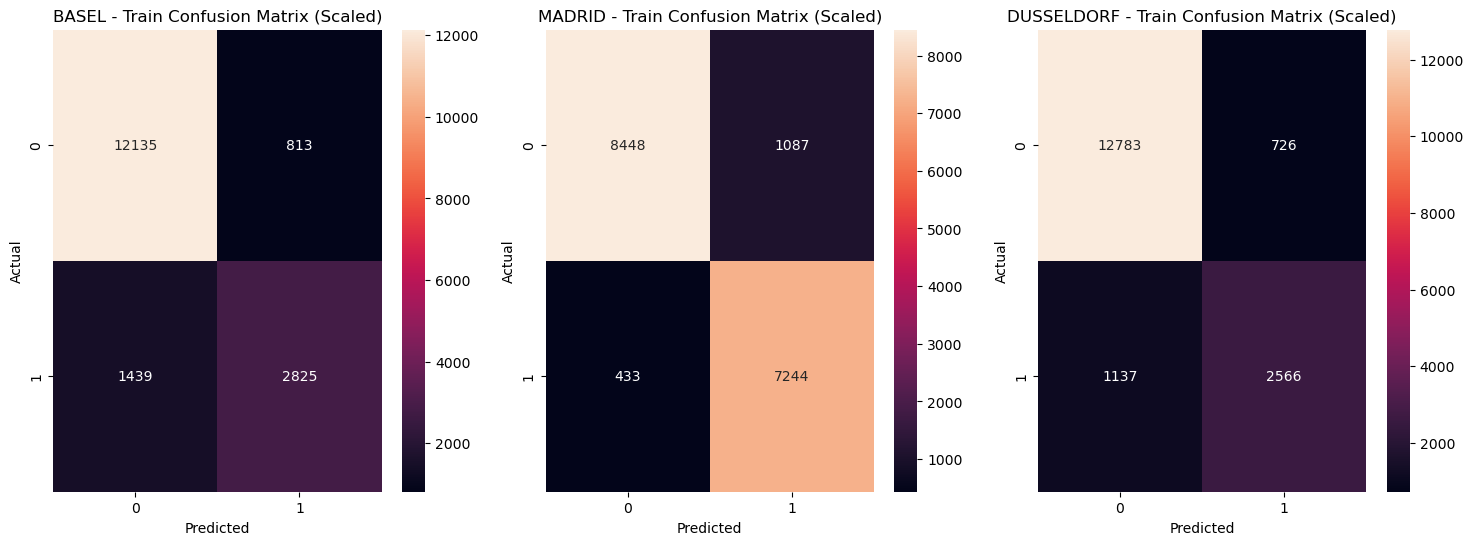

In [58]:
# Create a confusion matrix for training data using scaled data
selected_stations = ['BASEL', 'MADRID', 'DUSSELDORF']
key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']

figure, ax = plt.subplots(1, 3, figsize=(18, 6))

for idx, station in enumerate(selected_stations):
    true_vals = y_train[station + key]
    pred_vals = y_train_pred_scaled[:, y_train.columns.get_loc(station + key)]
    cm = confusion_matrix(true_vals, pred_vals)
    
    sns.heatmap(cm, annot=True, fmt='g', ax=ax[idx])
    ax[idx].set_title(f"{station} - Train Confusion Matrix (Scaled)")
    ax[idx].set_xlabel("Predicted")
    ax[idx].set_ylabel("Actual")

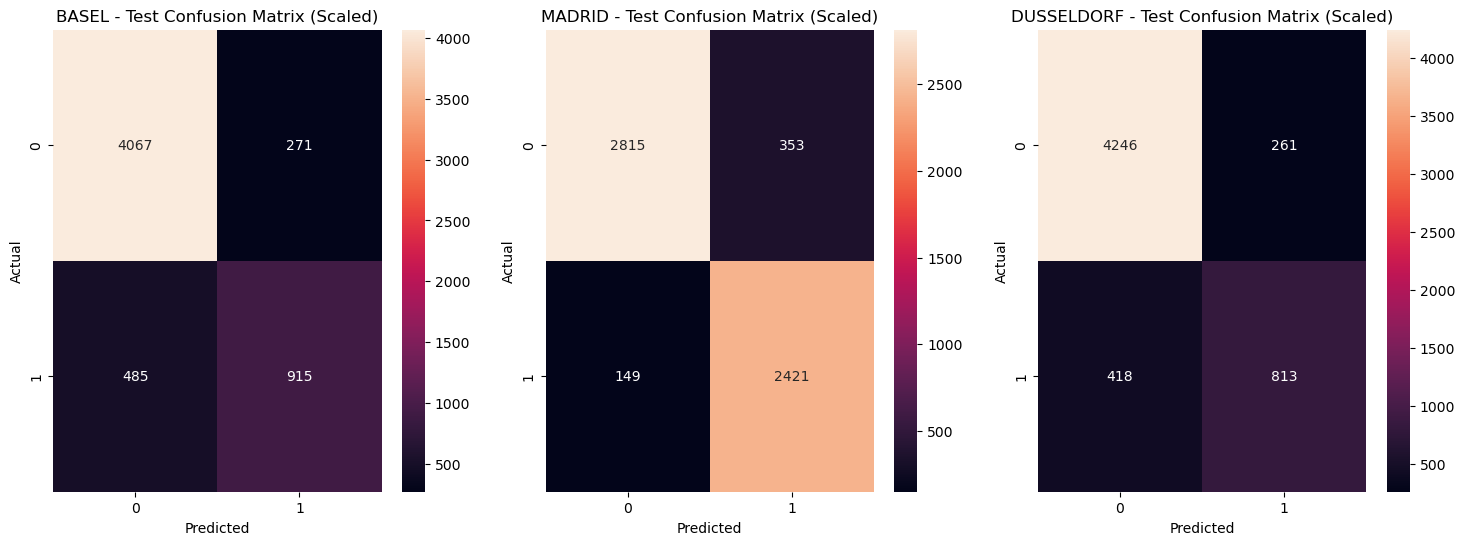

In [59]:
# Create a confusion matrix for testing data using scaled data
selected_stations = ['BASEL', 'MADRID', 'DUSSELDORF']
key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']

figure, ax = plt.subplots(1, 3, figsize=(18, 6))

for idx, station in enumerate(selected_stations):
    true_vals = y_test[station + key]
    pred_vals = y_test_pred_scaled[:, y_test.columns.get_loc(station + key)]
    cm = confusion_matrix(true_vals, pred_vals)
    
    sns.heatmap(cm, annot=True, fmt='g', ax=ax[idx])
    ax[idx].set_title(f"{station} - Test Confusion Matrix (Scaled)")
    ax[idx].set_xlabel("Predicted")
    ax[idx].set_ylabel("Actual")

##### The ANN model shows consistent and strong performance across both training and testing datasets. Accuracy remains high for all three weather stations evaluated. The average accuracy drops slightly from 89% (train) to 87% (test), which suggests that the model generalises well and is not significantly overfitting. This stability between training and testing performance indicates that the model has effectively captured the underlying patterns in the data without simply memorising the training set.